Team:
- Team Member 1 (XX%)
- Team Member 2 (XX%)
- Team Member 3 (XX%)
- Team Member 4 (XX%)

# **Tasks**

- Implement the SVM linear dual formulation
- Compare results from the primal and dual formulation
- Find the best hyperparameters for SVM linear to classify the dataset

# **SVM Linear**

### 1. **Objective Function**

The goal of the SVM is to find the hyperplane that best separates the data into two classes with a maximum margin. The objective function consists of two parts:

- **Margin Maximization**

- **Penalty for Misclassification**

The complete objective function $L$ can be written as:

$$L(\mathbf{W}, b) = \frac{1}{2} \| \mathbf{W} \|^2 + C \sum_{i}^n \max(0, 1 - t^i (\mathbf{W} \cdot \mathbf{x}^i + b))$$
$$L(\mathbf{W}, b) = \lambda \frac{1}{2} \| \mathbf{W} \|^2 + \sum_{i}^n \max(0, 1 - t^i (\mathbf{W} \cdot \mathbf{x}^i + b))$$

### 2. **Gradient Calculation**

To optimize the objective function using gradient descent, we need to compute the gradients of the objective function with respect to the weights $\mathbf{W}$ and bias $b$:

- **Gradient with respect to $\mathbf{W}$**:

  For each data point $(\mathbf{x}^i, t^i)$:
  $$\text{gradient}_{\mathbf{W}} = \lambda \mathbf{W} - \sum_{i}^n \left( t^i \cdot \mathbf{x}^i \text{ if } 1 - t^i (\mathbf{W} \cdot \mathbf{x}^i + b) > 0 \text{ else } 0 \right)$$

  Averaging over all data points:
  $$\text{dw} = \lambda \mathbf{W} - \frac{1}{n} \sum_{i}^n  \left( t^i \cdot \mathbf{x}^i \text{ if } 1 - t^i (\mathbf{W} \cdot \mathbf{x}^i + b) > 0 \text{ else } 0 \right)$$
cdot
- **Gradient with respect to $b$**:

  For each data point $(\mathbf{x}^i, t^i)$:
  $$
  \text{gradient}_{b} = -\sum_{i}^n  \left( t^i \text{ if } 1 - t^i (\mathbf{W} \cdot \mathbf{x}^i + b) > 0 \text{ else } 0 \right)
  $$

  Averaging over all data points:
  $$
  \text{db} = -\frac{1}{n} \sum_{i}^n  \left( t^i \text{ if } 1 - t^i (\mathbf{W} \cdot \mathbf{x}^i + b) > 0 \text{ else } 0 \right)
  $$

### 4. **Prediction**

The decision function for making predictions is:

$$
f(\mathbf{x}) = \text{sign}(\mathbf{W} \cdot \mathbf{x} + b)
$$

In [ ]:
import numpy as np

class LinearSVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.losses = []
        self.W = None
        self.b = None

    def fit(self, X, y):
        # Number of samples and features
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)

        # Initialize weights and bias
        self.W = np.zeros(n_features)
        self.b = 0

        # Gradient descent optimization
        for i in range(self.n_iters):
            for idx, x_i in enumerate(X):
               condition = y_[idx] * (np.dot(x_i, self.W) + self.b) >= 1
               if condition:
                   # No misclassification, just regularize
                   dw = self.lambda_param * self.W
                   self.W -= self.lr * dw
               else:
                   # Misclassification, update the weights and bias
                   dw = self.lambda_param * self.W - np.dot(x_i, y_[idx])
                   db = - y_[idx]
                   self.W -= self.lr * dw
                   self.b -= self.lr * db

            # Calculate the loss for monitoring
            margins = 1 - y * (np.dot(X, self.W) + self.b)
            loss = (0.5 * np.dot(self.W, self.W)) + self.lambda_param * np.sum(np.maximum(0, margins))
            self.losses.append(loss)

            if i % 100 == 0:
                print(f'Epoch {i}, Loss: {loss}')

    def predict(self, X):
        # Apply the decision function w.x + b
        approx = np.dot(X, self.W) + self.b
        return np.sign(approx)

In [ ]:
import matplotlib.pyplot as plt

def plot_decision_boundary(X, y, model):
    # Define the grid range
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    # Compute the decision function for each point on the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and margin
    plt.contourf(xx, yy, Z, alpha=0.3, levels=[-1, 0, 1], cmap='coolwarm')
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], colors='k', linestyles=['--', '-', '--'])

    # Scatter plot for the actual data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', s=50)
    plt.title('SVM Decision Boundary')
    plt.show()

Epoch 0, Loss: 0.6967995066320047
Epoch 100, Loss: 0.5997712432310216
Epoch 200, Loss: 0.6452860997387491
Epoch 300, Loss: 0.7739538965491268
Epoch 400, Loss: 0.9834548894237534
Epoch 500, Loss: 1.2488855411155018
Epoch 600, Loss: 1.5009524770801754
Epoch 700, Loss: 1.7402474253388034
Epoch 800, Loss: 1.940551913208776
Epoch 900, Loss: 2.1222398850562096
Accuracy: 1.00


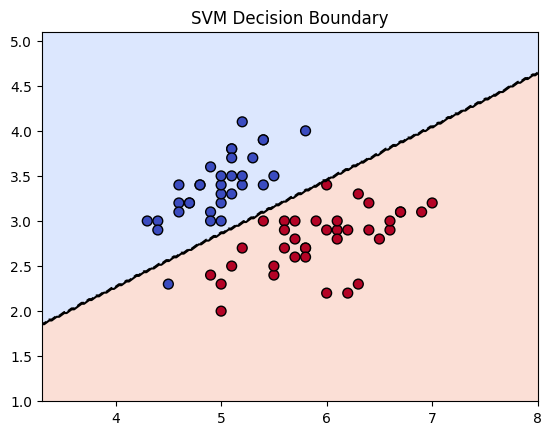

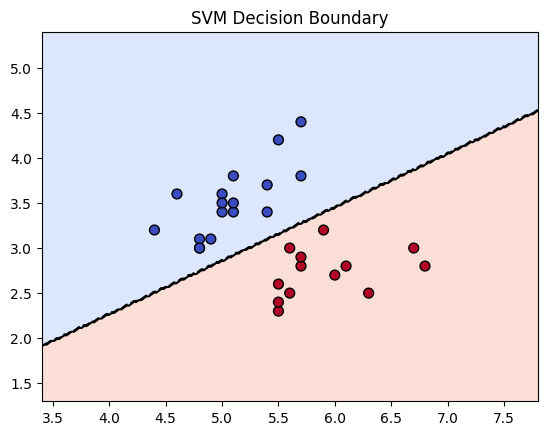

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Generate a synthetic dataset
data = load_iris()
X, y = data.data, data.target
# Filter out class 0
X = X[y != 2, :2]
y = y[y != 2]
y = 2 * y - 1

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the SVM model
svm = LinearSVM(learning_rate=0.0001, n_iters=1000, lambda_param=0.01)
svm.fit(X_train, y_train)

# Evaluate the model
y_pred = svm.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy:.2f}')

# Plotting the decision boundary
plot_decision_boundary(X_train, y_train, svm)
plot_decision_boundary(X_test, y_test, svm)

# **SVM Linear (Dual)**

The **dual form** of the Support Vector Machine (SVM) problem arises from the **primal problem** when we want to solve it using **Lagrange multipliers**. While the primal form involves optimizing weights (`w`) and bias (`b`), the dual form focuses on finding **Lagrange multipliers** (`α`), which represent the contribution of each training example to the decision boundary.

#### 1. **Lagrange Multiplier and Dual Form**

To handle the constraints, we introduce **Lagrange multipliers** $alpha_i \geq 0$ (one for each training sample) and form the **Lagrangian**:
$$
L(\mathbf{w}, b, \alpha) = \frac{1}{2} \|\mathbf{w}\|^2 + \sum_{i=1}^{n} \alpha_i [1 - t^i (\mathbf{w} \cdot \mathbf{x}^i + b)]
$$
The idea is to maximize this Lagrangian over $\alpha$, while minimizing over $\mathbf{w}$ and $b$.

#### 2. **KKT Conditions**

The dual form is derived by using the **Karush-Kuhn-Tucker (KKT) conditions**. These conditions ensure that at the solution:
- $\alpha_i [1 - t^i (\mathbf{w} \cdot \mathbf{x}^i + b)] = 0$ (meaning that $\alpha_i > 0$ only for points on the margin boundary, the **support vectors**).
- $\mathbf{w} = \sum_{i=1}^n \alpha_i t^i \mathbf{x}^i$
- $\sum_{i=1}^{n} \alpha_i t^i = 0$

Using these conditions, we eliminate $\mathbf{w}$ and $b$ from the primal problem and get the dual formulation.

#### 3. **Dual Form Objective**

The dual problem maximizes the following with respect to $\alpha$:
$$
\max_{\alpha} \sum_{i=1}^{n} \alpha_i - \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \alpha_i \alpha_j t^i t^j (\mathbf{x}^i \cdot \mathbf{x}^j)
$$
subject to:
$$
\alpha_i \geq 0 \quad \forall i
$$
In this formulation:
- $\mathbf{x}_i \cdot \mathbf{x}_j$ is the **dot product** (kernel) of the feature vectors, showing that the dual form can easily be extended to **non-linear SVMs** by replacing the dot product with a **kernel function** $K(\mathbf{x}_i, \mathbf{x}_j)$.
- The **Lagrange multipliers** $\alpha_i$ control the contribution of each sample to the solution, with most being zero, except for the **support vectors**.

#### 4. **Key Insights of the Dual Form**

- **Support Vectors**: Only the data points that lie on the margin (called support vectors) have non-zero $\alpha_i$, influencing the decision boundary.
- **Non-linearity**: The dual form is more powerful when combined with kernel functions, allowing SVM to handle **non-linear** decision boundaries.
- **Computational Advantages**: In some cases, solving the dual form is computationally easier than solving the primal form, especially when the number of features is large.

This dual formulation plays a crucial role in **kernelized SVMs**, where we can efficiently compute the decision boundary in higher-dimensional spaces without explicitly calculating the coordinates in those spaces (thanks to the **kernel trick**).

#### 5. **Decision Function**

Once the optimal $\alpha$ values are found, the decision function is:
$$
f(\mathbf{x}) = \text{sign} \left( \sum_{i=1}^{n} \alpha_i t^i K(\mathbf{x}^i, \mathbf{x}) + b \right)
$$

Where $K(\mathbf{x}_i, \mathbf{x}) = \mathbf{x}_i \cdot \mathbf{x}$ for a linear SVM, or a kernel function for non-linear SVMs.

# **Dataset (SVM Linear)**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# We will simulate spam classification using only two classes: 'comp.sys.mac.hardware' and 'rec.autos'
categories = ['comp.sys.mac.hardware', 'rec.autos']
newsgroups = datasets.fetch_20newsgroups(subset='all', categories=categories)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(newsgroups.data, newsgroups.target, test_size=0.3, random_state=42)

# Convert text data into TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print(X_train_tfidf.shape, y_train.shape)
print(X_test_tfidf.shape, y_test.shape)

# (Hint: You can use classification_report to report your classification results)
# print(classification_report(y_test, y_pred, target_names=newsgroups.target_names))

(1367, 1000) (1367,)
(586, 1000) (586,)


# **Dataset (SVM Non Linear)**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Generate XOR dataset
X = np.array([[0, 0], [1, 1], [0, 1], [1, 0]])
y = np.array([1, 1, -1, -1])


# (Hint: You can use classification_report to report your classification results)
# print(classification_report(y_test, y_pred, target_names=newsgroups.target_names))

# You can also use this function for plotting
# Plotting decision boundary
def plot_decision_boundary(X, y, model):
    # Create grid to evaluate model
    xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 500), np.linspace(-0.5, 1.5, 500))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and margins
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title('Non-linear SVM with RBF Kernel (XOR Problem)')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# plot_decision_boundary(X, y, svm)